## Data Processing And Analysis

### Importing Modules (p406)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline
import seaborn as sns

### Introduction to Pandas (p407)

#### Series (p407)

In [2]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [3]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

In [5]:
# assign the index attribute of a Series to 
# a list with new indices
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [6]:
# set the index/name through kwargs to the Series object
s = pd.Series(
    [909976, 8615246, 2872086, 2273305],
    name="Population",
    index=["Stockholm", "London", "Rome", "Paris"]
)

In [7]:
# access elements in a Series by indexing with the corresponding
# index or directly though an attribute with the same name as
# the index
s["London"], s.Stockholm

(8615246, 909976)

In [8]:
# indexing a Series object iwth a list of indices gives a new
# Series object with a subset of the original data
s[['Paris', 'Rome']]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [9]:
# compute descriptive statistics using the Series methods
s.median(), s.mean(), s.std(), s.min(), s.max(), s.quantile(q=0.25)

(2572695.5, 3667653.25, 3399048.5005155364, 909976, 8615246, 1932472.75)

In [10]:
# describe method provides a summary of the data
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

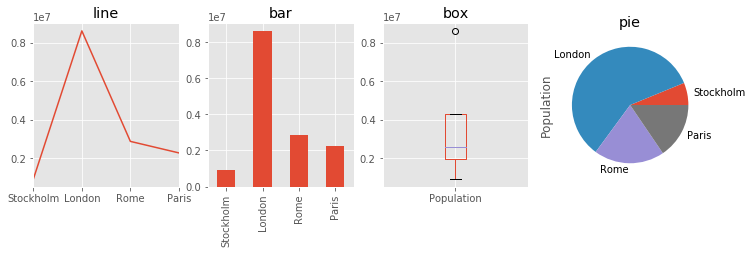

In [11]:
# pandas uses Matplotlib for plotting
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie');

#### DataFrame (p410)

In [12]:
# pass a nested Python list to the constructor of the DataFrame object
df = pd.DataFrame([
    [909976, "Sweden"],
    [8615246, "United Kingdom"],
    [2872086, "Italy"],
    [2273305, "France"]
])
df

,0,1
0,909976,Sweden
1,8615246,United Kingdom
2,2872086,Italy
3,2273305,France


In [13]:
# 1) use labled indexing for rows by assigning a sequence of lables to the index attribute
# 2) set the columns attribute to a sequence of labels for the columns
df.index = ["Stockholm", "London", "Rome", "Paris"]
df.columns = ["Population", "State"]
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [14]:
# index/column attributes can be set using the corresponding kwargs
# to the DataFrame when created
df = pd.DataFrame(
    [
        [909976, "Sweden"],
        [8615246, "United Kingdom"],
        [2872086, "Italy"],
        [2273305, "France"]
    ],
    index=["Stockholm", "London", "Rome", "Paris"],
    columns=["Population", "State"]
)
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [15]:
# pass a dictionary with column titles as keys and column data as values
df = pd.DataFrame(
    {
        "Population": [909976, 8615246, 2872086, 2273305],
        "State": ["Sweden", "United Kingdom", "Italy", "France"]
    },
    index=["Stockholm", "London", "Rome", "Paris"]
)
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


#### Time Series (p422)

### The Seaborn Graphics Library (p434)